In [92]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train = X_train.reshape(60000, 784).astype('float32')/255 

In [5]:
num_val_samples = 10000
X_val = X_train[-num_val_samples:]
y_val = y_train[-num_val_samples:]
X_train = X_train[:-num_val_samples]
y_train = y_train[:-num_val_samples]



### Designing of Neural Network

In [6]:
# Instantiate a simple classification model:


model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
    tf.keras.layers.Dense(256, activation=tf.nn.tanh), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(64, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10)
])

# Instantiates a loss function that expects integer targets.

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric

accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# recall = tf.keras.metrics.Recall()

# Instantiate an optimizer:

optimizer =  tf.keras.optimizers.Adam()

model.compile(optimizer = optimizer, 
             loss=loss, 
             metrics=[accuracy])

model.fit(X_train, y_train,
         validation_data = (X_val, y_val), 
         epochs=10, 
         batch_size=64, verbose=1)

Epoch 1/10
782/782 [==============================] - 4s 3ms/step - loss: 0.2294 - sparse_categorical_accuracy: 0.9301 - val_loss: 0.1131 - val_sparse_categorical_accuracy: 0.9660
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0937 - sparse_categorical_accuracy: 0.9715 - val_loss: 0.0928 - val_sparse_categorical_accuracy: 0.9728
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0636 - sparse_categorical_accuracy: 0.9803 - val_loss: 0.0943 - val_sparse_categorical_accuracy: 0.9735
Epoch 4/10
782/782 [==============================] - 3s 3ms/step - loss: 0.0497 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0851 - val_sparse_categorical_accuracy: 0.9771
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0401 - sparse_categorical_accuracy: 0.9868 - val_loss: 0.0904 - val_sparse_categorical_accuracy: 0.9755
Epoch 6/10
782/782 [==============================] - 3s 3ms/step - loss: 0.0339 - sparse_categorica

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
# pip install visualkeras

In [9]:
from visualkeras import layered_view, graph_view
layered_view(model)

C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


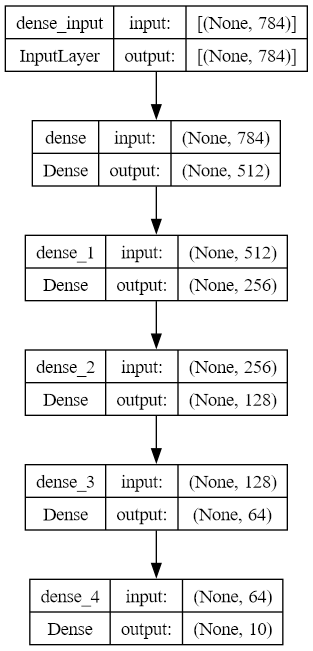

In [13]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True, to_file='model_plot.png')

In [11]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.01223326, -0.00986619,  0.00840023, ..., -0.06607843,
          0.03908718, -0.05169004],
        [-0.00584602,  0.05322617, -0.03661802, ...,  0.00376686,
         -0.01748511, -0.00414421],
        [ 0.01294936, -0.036522  , -0.04464415, ..., -0.03807794,
          0.03934702, -0.00435738],
        ...,
        [ 0.05506584,  0.00545627, -0.02051873, ..., -0.00544866,
          0.05516034, -0.02286138],
        [ 0.05785914, -0.0162734 ,  0.00615703, ..., -0.00752649,
          0.00513015, -0.00183715],
        [ 0.01752062,  0.06763655,  0.0549439 , ...,  0.03711925,
         -0.05826727,  0.0176425 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 8.35281238e-03, -2.24274099e-02, -1.68406740e-02,  4.50209714e-03,
        -4.59548607e-02, -1.96126439e-02, -1.09558422e-02, -1.54485172e-02,
        -2.20611412e-02,  1.82725564e-02, -1.02254361e-01,  1.13467919e

In [12]:
model.evaluate(X_test.reshape(10000, 784).astype('float32') / 255, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0908 - sparse_categorical_accuracy: 0.9787


[0.0907643735408783, 0.9786999821662903]

## Now, let's see a Regression Task

In [15]:
petrol_cons = pd.read_csv('datasets/petrol_consumption.csv')

In [16]:
petrol_cons.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


<Axes: xlabel='Population_Driver_licence(%)', ylabel='Petrol_Consumption'>

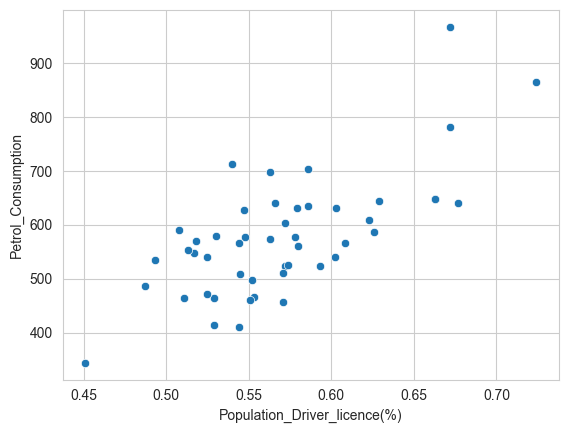

In [43]:
sns.set_style('whitegrid')
sns.scatterplot(data=petrol_cons, x='Population_Driver_licence(%)', y='Petrol_Consumption')

In [48]:
petrol_cons.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [50]:
X = petrol_cons.iloc[:, :4].values
y = petrol_cons.iloc[:, 4].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scl = sc.fit_transform(X_train)
X_test_scl = sc.transform(X_test)



In [55]:
X_train_scl

array([[-1.14584986, -0.88868457,  0.52617729,  1.08914549],
       [-0.21511308,  1.42713343,  2.25627633, -0.77499612],
       [ 0.29072213,  0.23948961,  0.72854876, -0.70329837],
       [ 0.79655734,  0.46162623, -0.89423619, -0.30896072],
       [ 0.29072213, -0.21352917,  0.01984006, -0.09386745],
       [-0.72094829,  0.70999946,  0.00349781,  2.79196715],
       [-0.72094829,  0.88665929,  0.27995413,  0.10330137],
       [ 1.30239255, -0.77849082, -1.17559518,  0.210848  ],
       [ 0.79655734,  0.05408424,  0.02937304,  1.94951854],
       [-0.72094829, -1.17203995,  0.27314486, -0.90046719],
       [ 1.30239255, -0.09109166, -0.33124584, -0.91839163],
       [ 1.30239255, -1.29272835, -1.06937059, -0.77499612],
       [ 0.29072213, -1.50786854, -0.1370455 , -0.36273403],
       [ 2.31406296,  1.8049406 , -1.24450499,  0.04952805],
       [-0.72094829, -0.18029613,  0.18462437, -0.41650735],
       [-0.72094829,  0.03834227,  0.61469779,  0.71273228],
       [-2.74428912, -0.

## Designing the Neural Network architecture for Regression Task

In [61]:
input_layer = Input(shape=(X.shape[1],))

dense_layer_1 = Dense(100, activation='relu', kernel_regularizer = 'l2')(input_layer)
dense_layer_2 = Dense(50, activation='relu', kernel_regularizer='l2')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu', kernel_regularizer='l2')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)

# R2Score = tf.keras.metrics.R2Score()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [62]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_9 (Dense)             (None, 100)               500       
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 25)                1275      
                                                                 
 dense_12 (Dense)            (None, 1)                 26        
                                                                 
Total params: 6,851
Trainable params: 6,851
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model.fit(X_train_scl, y_train, batch_size=10, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 1s 105ms/step - loss: 323932.1250 - mean_squared_error: 323931.0000 - val_loss: 379202.2188 - val_mean_squared_error: 379201.1250
Epoch 2/50
3/3 [==============================] - 0s 23ms/step - loss: 323738.9062 - mean_squared_error: 323737.8125 - val_loss: 378988.8125 - val_mean_squared_error: 378987.7500
Epoch 3/50
3/3 [==============================] - 0s 23ms/step - loss: 323569.3438 - mean_squared_error: 323568.2812 - val_loss: 378749.2500 - val_mean_squared_error: 378748.1875
Epoch 4/50
3/3 [==============================] - 0s 28ms/step - loss: 323376.0625 - mean_squared_error: 323375.0312 - val_loss: 378511.5000 - val_mean_squared_error: 378510.4375
Epoch 5/50
3/3 [==============================] - 0s 23ms/step - loss: 323165.4062 - mean_squared_error: 323164.3438 - val_loss: 378246.4375 - val_mean_squared_error: 378245.3750
Epoch 6/50
3/3 [==============================] - 0s 26ms/step - loss: 322948.3438 - mean_squared_error:

In [64]:
print(history.history)

{'loss': [323932.125, 323738.90625, 323569.34375, 323376.0625, 323165.40625, 322948.34375, 322703.0, 322387.1875, 322062.46875, 321633.21875, 321148.875, 320532.65625, 319846.0, 318968.28125, 317967.96875, 316867.0625, 315472.59375, 314057.53125, 312178.59375, 310242.71875, 307861.0, 305258.625, 302139.71875, 298650.59375, 294747.40625, 290370.46875, 285306.53125, 279763.5, 273805.375, 266899.78125, 259259.390625, 251294.0625, 242148.703125, 232890.328125, 222216.046875, 211167.40625, 198902.21875, 186689.171875, 173552.59375, 160243.890625, 146752.0, 133452.4375, 119486.4609375, 106458.96875, 92892.171875, 80797.0546875, 69338.8671875, 59612.41796875, 50999.9453125, 43225.37109375], 'mean_squared_error': [323931.0, 323737.8125, 323568.28125, 323375.03125, 323164.34375, 322947.28125, 322701.9375, 322386.15625, 322061.40625, 321632.125, 321147.8125, 320531.5625, 319844.90625, 318967.1875, 317966.84375, 316865.96875, 315471.46875, 314056.40625, 312177.46875, 310241.53125, 307859.8125, 30

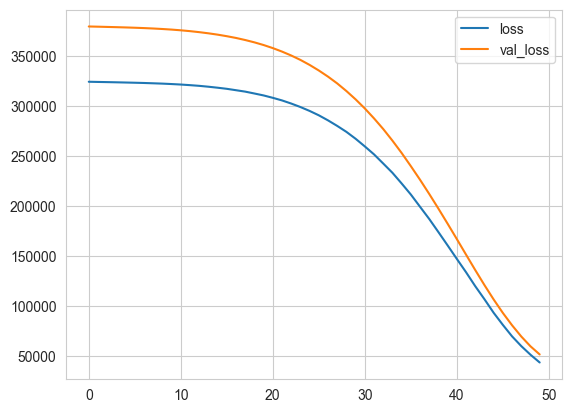

(<matplotlib.legend.Legend at 0x26ecc140190>, None)

In [66]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(), plt.show()

In [69]:
# Let's calculate the RMSE of this regression problem:

from sklearn.metrics import root_mean_squared_error as rmse, r2_score

y_train_pred = model.predict(X_train_scl)

y_test_pred = model.predict(X_test_scl)

print(f'\n\nRoot mean square error of train data: {rmse(y_train, y_train_pred)}')
print(f'Root mean square error of test data: {rmse(y_test, y_test_pred)}')

print('\n\n')

print(f'R2 Score of train data: {r2_score(y_train, y_train_pred)}')
print(f'R2 Score of test data: {r2_score(y_test, y_test_pred)}')

1/1 [==============================] - 0s 20ms/step


Root mean square error of train data: 203.5338720610205
Root mean square error of test data: 247.8067201566109



R2 Score of train data: -1.9122838973999023
R2 Score of test data: -19.506031036376953


In [70]:
petrol_cons.shape

(48, 5)

## Boston House

In [71]:
bos_hs = pd.read_csv('datasets/HousingData.csv')

bos_hs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [72]:
bos_hs.shape

(506, 14)

In [74]:
X = bos_hs.iloc[:, :13].values
y = bos_hs.iloc[:, 13].values

print(X.shape, y.shape)

from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

X_scl = rs.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scl, y, test_size=0.2, random_state=17)

(506, 13) (506,)


In [75]:
X_test.shape

(102, 13)

In [76]:
X_train.shape

(404, 13)

In [77]:
X_test

array([[            nan,  3.60000000e+00, -4.84120837e-01, ...,
        -1.37500000e+00, -8.29835712e-02, -6.85656155e-01],
       [-6.97900233e-02,  4.40000000e+00, -5.76297444e-01, ...,
        -1.33928571e+00,  1.57333014e-01, -3.25534079e-01],
       [ 9.88797171e-01,  0.00000000e+00,  6.51432998e-01, ...,
         4.10714286e-01, -4.79673822e-04,  3.27568667e-01],
       ...,
       [-6.04724206e-02,  1.68000000e+00,             nan, ...,
        -8.03571429e-01,  1.21357477e-01, -2.03458800e-01],
       [-3.39743198e-02,  1.00000000e+00, -2.80402789e-01, ...,
        -5.35714286e-02,  2.61901907e-01,  1.68870804e-01],
       [            nan,  4.20000000e+00, -3.38497289e-01, ...,
        -8.75000000e-01,  2.61901907e-01, -3.89623601e-01]])

## Let's design the architect now

In [89]:
model = Sequential()
model.add(Dense(40, input_dim=13, activation='tanh', kernel_regularizer='L2'))
model.add(Dense(20, activation='relu', kernel_regularizer='L2'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='tanh', kernel_regularizer='L2'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['R2Score'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 40)                560       
                                                                 
 dense_31 (Dense)            (None, 20)                820       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_32 (Dense)            (None, 10)                210       
                                                                 
 dense_33 (Dense)            (None, 5)                 55        
                                                                 
 dense_34 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,651
Trainable params: 1,651
Non-traina

In [90]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=1)

scores = model.evaluate(X_train, y_train, batch_size=32)
print(scores)

scores = model.evaluate(X_test, y_test, batch_size32)
print(scores)

Epoch 1/200


ValueError: in user code:

    File "C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\keras\engine\training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\keras\engine\compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\keras\engine\compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\keras\engine\compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\keras\engine\compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\keras\engine\compile_utils.py", line 650, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\keras\metrics\__init__.py", line 181, in get
        return deserialize(str(identifier))
    File "C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\keras\metrics\__init__.py", line 136, in deserialize
        return deserialize_keras_object(
    File "C:\ProgramData\anaconda3\envs\Deep_Learning\lib\site-packages\keras\utils\generic_utils.py", line 769, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: R2Score. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [93]:
tf.__version__

'2.10.1'

In [ ]:
print('Changes have been done to the file')